Step 2b - The intercept is 2.8214435277945973
and the slope of logage is 0.14517884229637157
Step 2f - The Mean Squared Error is 0.05170161564428306
Step 3d - The Mean Squared Error after adjustments is 0.7816569449182872
The intercept is 2.7878062686875347
and the slope of logglucose is 0.11787471735253043
MSE of the second fitted model: 0.0684725427382981
MSE after adjustments for the second model: 624.8522484212564


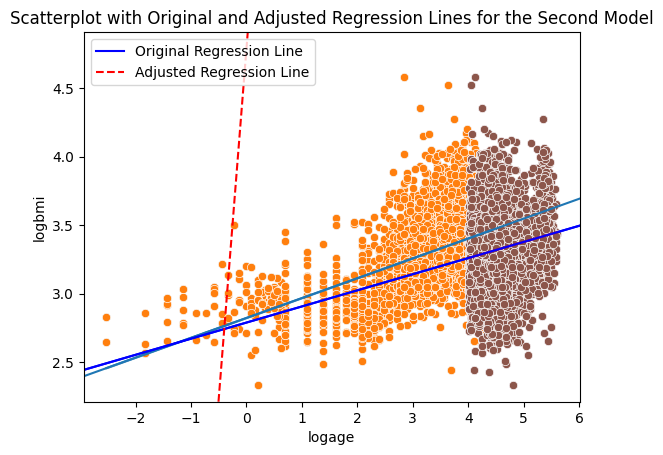

In [2]:
# Step 1: Find two data sets and variables
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the healthcare dataset
healthcare = pd.read_csv("healthcare.csv")

# Identify and transform variables for analysis
healthcare["logbmi"] = np.log(healthcare["bmi"])
healthcare["logage"] = np.log(healthcare["age"])

# Step 2: Fit linear models for both pairs of variables
# a) Fit a linear model for logbmi as the dependent variable and logage as the predictor
healthcare_ols = smf.ols('logbmi ~ 1 + logage', data=healthcare)
healthcare_fit = healthcare_ols.fit()

# b) Save the parameters and print their values
fit_intercept = healthcare_fit.params["Intercept"]
fit_logage_slope = healthcare_fit.params["logage"]
print(f"Step 2b - The intercept is {fit_intercept}\nand the slope of logage is {fit_logage_slope}")

# c) Create a scatterplot and plot the regression line
sns.scatterplot(data=healthcare, x="logage", y="logbmi")
plt.axline([0, fit_intercept], slope=fit_logage_slope)

# d) Calculate a vector of predicted values
predicted_ys = fit_intercept + (fit_logage_slope * healthcare["logage"])

# e) Create another scatterplot with the regression line based on predicted values
sns.scatterplot(data=healthcare, x="logage", y="logbmi")
sns.lineplot(data=healthcare, x="logage", y=predicted_ys)

# f) Calculate the Mean Squared Error (MSE) manually
mse_fit1 = ((healthcare["logbmi"] - predicted_ys) ** 2).mean()
print(f"Step 2f - The Mean Squared Error is {mse_fit1}")

# Step 3: Explore further for one pair of variables
# a) Calculate MSE manually
mse_fit1 = ((healthcare["logbmi"] - predicted_ys) ** 2).mean()

# b) Adjust the intercept and slope
adjustment_to_intercept = 0.5  # Adjust this value
adjustment_to_slope = 0.1  # Adjust this value

adjusted_intercept = fit_intercept + adjustment_to_intercept
adjusted_slope = fit_logage_slope + adjustment_to_slope

# c) Create predictions using adjusted parameters
predictions = adjusted_intercept + (adjusted_slope * healthcare["logage"])

# d) Calculate the Mean Squared Error (MSE) after adjustments
mse_after_adjustments = ((healthcare["logbmi"] - predictions) ** 2).mean()
print(f"Step 3d - The Mean Squared Error after adjustments is {mse_after_adjustments}")




The intercept is 2.7878062686875347
and the slope of logglucose is 0.11787471735253043
MSE of the second fitted model: 0.0684725427382981
MSE after adjustments for the second model: 624.8522484212564


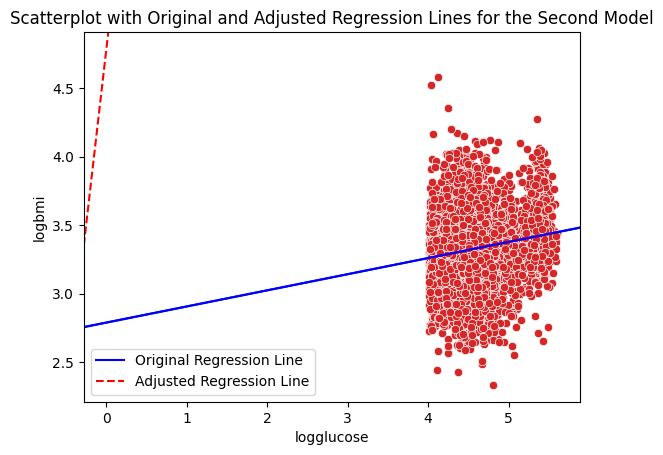

In [4]:
# Use a different pair of numeric variables
healthcare["logbmi"] = np.log(healthcare["bmi"])
healthcare["logglucose"] = np.log(healthcare["avg_glucose_level"])

# Create a scatterplot of the new data
sns.scatterplot(data=healthcare, x="logglucose", y="logbmi")
plt.title("Scatterplot of logglucose vs. logbmi")

# Fit a linear model with logglucose as the predictor and logbmi as the dependent variable
healthcare_ols2 = smf.ols('logbmi ~ 1 + logglucose', data=healthcare)
healthcare_fit2 = healthcare_ols2.fit()
healthcare_fit2.summary()

# Save the intercept and slope parameters and print their values for the second model
fit_intercept2 = healthcare_fit2.params["Intercept"]
fit_logglucose_slope = healthcare_fit2.params["logglucose"]
print(f"The intercept is {fit_intercept2}\nand the slope of logglucose is {fit_logglucose_slope}")

# Create a scatterplot of the data and plot the regression line for the second model
sns.scatterplot(data=healthcare, x="logglucose", y="logbmi")
plt.axline([0, fit_intercept2], slope=fit_logglucose_slope, color="blue")
plt.title("Scatterplot of logglucose vs. logbmi with Regression Line")

# Calculate a vector of predicted values for the second model
predicted_ys2 = fit_intercept2 + (fit_logglucose_slope * healthcare["logglucose"])

# Create another scatterplot with the regression line based on predicted values for the second model
sns.scatterplot(data=healthcare, x="logglucose", y="logbmi")
sns.lineplot(data=healthcare, x="logglucose", y=predicted_ys2, color="red")
plt.title("Scatterplot of logglucose vs. Predicted logbmi")

mse_fit2 = ((healthcare["logbmi"] - predicted_ys2) ** 2).mean()
print(f"MSE of the second fitted model: {mse_fit2}")

adjustment_to_intercept2 = 2  
adjustment_to_slope2 = 5  

# Adjust the intercept and slope for the second model
adjusted_intercept2 = fit_intercept2 + adjustment_to_intercept2
adjusted_slope2 = fit_logglucose_slope + adjustment_to_slope2

# Generate new predictions based on adjusted parameters for the second model
predictions2 = adjusted_intercept2 + (adjusted_slope2 * healthcare["logglucose"])

# Calculate the MSE after adjustments for the second model
MSE_after_adjustments2 = ((healthcare["logbmi"] - predictions2) ** 2).mean()
print(f"MSE after adjustments for the second model: {MSE_after_adjustments2}")

# Create scatter plots to visualize the adjustments for the second model
sns.scatterplot(data=healthcare, x="logglucose", y="logbmi")
plt.axline([0, fit_intercept2], slope=fit_logglucose_slope, color="blue", label="Original Regression Line")
plt.axline([0, adjusted_intercept2], slope=adjusted_slope2, linestyle="dashed", color="red", label="Adjusted Regression Line")
plt.title("Scatterplot with Original and Adjusted Regression Lines for the Second Model")
plt.legend()

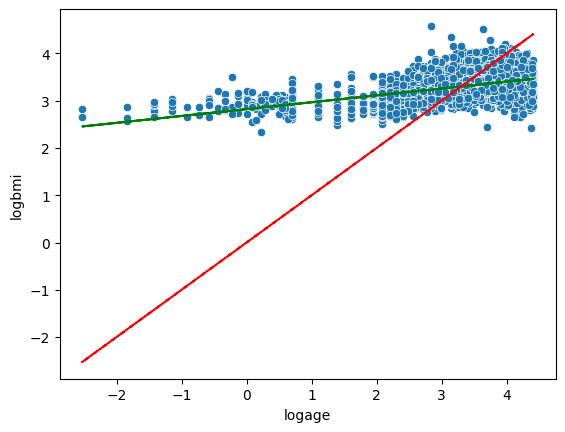

In [3]:
# Step 4: Seek out a data set for "regression to the mean" phenomenon
# Healthcare is an example of this, as a patient with an exceptionally 
# good response to a medication may not experience the same level of improvement in the following treatments.
# a) Examine the two variables and create a scatterplot
sns.scatterplot(data=healthcare, x="logage", y="logbmi")

# b) Fit a regression and plot the regression line
healthcare_ols = smf.ols('logbmi ~ 1 + logage', data=healthcare)
healthcare_fit = healthcare_ols.fit()
predicted_ys = healthcare_fit.predict(healthcare["logage"])
plt.plot(healthcare["logage"], predicted_ys, color="green", label="Regression Line")

# c) Plot a 1:1 line for comparison
plt.plot(healthcare["logage"], healthcare["logage"], color="red", linestyle="--", label="1:1 Line")

